# Benchmarking

The main reason we go for benchmarking any application is to find how our application is behaving and what all are the bottlenecks and allows us to find where all we can do optimization.

In this section we will discuss about various methods which we can use to find the bottlenecks. For optimization, we have seperate chapter.

## `timeit`

This is the most common and easy to use method to find how much time on an average any function or peice of code takes. We have been using a varient of it extensivly in various chapters. Still lets discuss how to use it. 

Lets take a problem for which we will like to find the most efficient solution. Say, we have a list of integers and wanted to find the sum of list elements.

In [1]:
from functools import reduce
from operator import mul
from numpy import prod, array

def multiply_numpy(iterable):
    return prod(array(iterable))

def multiply_functools(iterable):
    return reduce(mul, iterable)

def multiply_manual(iterable):
    prod = 1
    for x in iterable:
        prod *= x
    return prod

def multiply_lambda(A):
    return reduce((lambda x,y: x*y),A)

# very bad performance and fails after 998 elements on my machine thus
# have not used in the example below
def multiply_recursion(lst):
    if len(lst) > 1:
        return multiply_recursion(lst[:-1])* lst[-1]
    else:
        return lst[0]

Now lets create the list using `randon.sample` function, which we can use. 

In [11]:
from random import sample

size = 10
dummy_data = sample(range(1, size*10), size) 
print(dummy_data)

[76, 69, 36, 88, 82, 50, 92, 56, 37, 40]


Now, lets test all the functions to if they are working without any issues.

In [14]:
print(multiply_functools(dummy_data))
print(multiply_manual(dummy_data))
print(multiply_lambda(dummy_data))
print(multiply_recursion(dummy_data))
print(multiply_numpy(dummy_data))

519360937869312000
519360937869312000
519360937869312000
519360937869312000
519360937869312000


## Importing `timeit` for Testing

Now lets find how much time they are going to take using `timeit` module

In [15]:
from timeit import timeit

setup = "from __main__ import multiply_lambda, dummy_data"
print(timeit("multiply_lambda(dummy_data)", setup=setup))

2.2055636700000036


In [16]:
from timeit import timeit

setup = "from __main__ import multiply_functools, dummy_data"
print(timeit("multiply_functools(dummy_data)", setup=setup))

1.321780106999995


In [17]:
from timeit import timeit

setup = "from __main__ import multiply_manual, dummy_data"
print(timeit("multiply_manual(dummy_data)", setup=setup))

0.9278362360000187


One issue with the above way is that it is still not able to tell me how above solutions will behave with varing size of lst, so we are going to create list of variaing size and test using following code. You can also use it as template.

In [ ]:
list_size = [10, 100, 1000, 5000, 10000]

from random import sample 
from timeit import Timer
import matplotlib.pyplot as plt

result_vals = {}
for size in list_size:
    # size*10 is added to keep the range options more than size and to have randomness.
    dummy_data = sample(range(1, size*2), size) 

    timer_functools = Timer(lambda: multiply_functools(dummy_data))
    timer_anual = Timer(lambda: multiply_manual(dummy_data))
    timer_lambda = Timer(lambda: multiply_lambda(dummy_data))
#     timer_recursion = Timer(lambda: multiply_recursion(dummy_data))

    repeats = int(100000 / size)

    result_functools = timer_functools.timeit(repeats)
    result_manual = timer_anual.timeit(repeats)
    result_lambda = timer_lambda.timeit(repeats)
    print("~"*46)
    print(f"size: {size} - repeats: {repeats}".center(46))
    print("~"*46)
    print("Function Name ".rjust(25), "Time taken".rjust(20))
    print("functools: ".rjust(25), "{result:>20.4}".format(result=result_functools))
    print("manual: ".rjust(25), "{result:>20.4}".format(result=result_manual))
    print("lambda: ".rjust(25), "{result:>20.4}".format(result=result_lambda))

Lets convert the above code to view it on graph

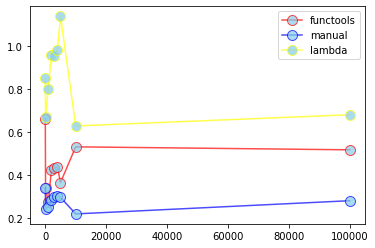

In [4]:
list_size = [10, 100, 1000, 2000, 3000, 4000, 5000, 10000, 100000]

from random import sample 
from timeit import Timer
import matplotlib.pyplot as plt

result_vals = {
                'functools': [],
                'manual': [],
                'lambda': []
              }
for size in list_size:
    # size*10 is added to keep the range options more than size and to have randomness.
    dummy_data = sample(range(1, size*10), size) 
    dummy_data = [1] * size
    timer_functools = Timer(lambda: multiply_functools(dummy_data))
    timer_anual = Timer(lambda: multiply_manual(dummy_data))
    timer_lambda = Timer(lambda: multiply_lambda(dummy_data))
#     timer_recursion = Timer(lambda: multiply_recursion(dummy_data))

    repeats = int(5e6 / size)
    
    result_vals['functools'].append(timer_functools.timeit(repeats))
    result_vals['manual'].append(timer_anual.timeit(repeats))
    result_vals['lambda'].append(timer_lambda.timeit(repeats))   
#     result_recursion = timer_recursion.timeit(repeats)

cols = ["red", "blue", "yellow"]
for i, key in enumerate(result_vals):
    plt.plot(list_size, result_vals[key], '-o', color=cols[i], label=key, ms=10, alpha=0.7, mfc='skyblue')
    plt.legend()
plt.show()

As we can see from the above graph, both the functions are performing nearly equal. so we can choose any algorithm

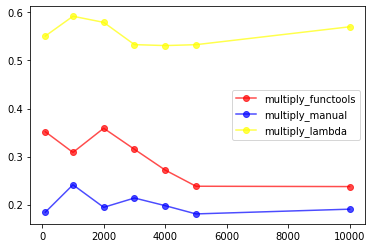

In [6]:
list_size = [100, 1000, 2000, 3000, 4000, 5000, 10000]

from random import sample, choice
from timeit import Timer
import matplotlib.pyplot as plt


functions = multiply_functools, multiply_manual, multiply_lambda
result_vals = {f.__name__: [] for f in functions}

for size in list_size:
    # size*10 is added to keep the range options more than size and to have randomness.
#     dummy_data = sample(range(1, size*10), size) 
    dummy_data = [1] * size
    repeats = int(5e6 / size)
    for func in functions:    
        result_vals[func.__name__].append(Timer(lambda: func(dummy_data)).timeit(repeats))


cols = ["red", "blue", "yellow"]
for i, key in enumerate(result_vals):
    plt.plot(list_size, result_vals[key], '-o', color=cols[i], label=key, ms=6, alpha=0.7)
    plt.legend()
plt.show()

Please note the value of data while doing the benchmarking, you would like to have data which replicates our production data without security overhead, meaning you **should** always sanitize your data before using it, so no security policy voilation happens.  

{'multiply_functools': [0.527080991000048, 0.8897393359999342, 1.6147010619999946, 1.8954935259999957, 2.33050911600003, 2.721930637000014, 5.028593657999977], 'multiply_manual': [0.3622921450000831, 0.6921827690000555, 1.4093685639999194, 1.8243431649999593, 2.206867281999962, 3.094417906999979, 5.159821729999976], 'multiply_lambda': [0.9914614439999241, 1.247876247000022, 1.9201982510001017, 2.3270507559999487, 2.7265884360000427, 3.5697107940000024, 6.054617178000058]}


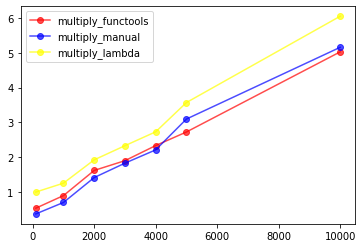

In [7]:
list_size = [100, 1000, 2000, 3000, 4000, 5000, 10000]

from random import sample, choice
from timeit import Timer
import matplotlib.pyplot as plt


functions = multiply_functools, multiply_manual, multiply_lambda
result_vals = {f.__name__: [] for f in functions}

for size in list_size:
    # size*10 is added to keep the range options more than size and to have randomness.
#     dummy_data = sample(range(1, size*10), size) 
    dummy_data = [10] * size
    repeats = int(5e6 / size)
    for func in functions:    
        result_vals[func.__name__].append(Timer(lambda: func(dummy_data)).timeit(repeats))


print(result_vals)
cols = ["red", "blue", "yellow"]
for i, key in enumerate(result_vals):
    plt.plot(list_size, result_vals[key], '-o', color=cols[i], label=key, ms=6, alpha=0.7)
    plt.legend()
plt.show()

## Custom decorator

We can even create our own decorator to do what we did in above examples, if you have never created one please refer the chapter "Decorators & Iterators" and come back again, its a small chapter only, thus should not take too much time. :)

In [9]:
def my_timeit(func):
    def __inner__(*args, **kwargs):
        from time import time
        start = time()
        value = func(*args, **kwargs)
        end = time()
        return start - end, value
    return __inner__
    

Lets add the above decorator to our function, 

In [10]:
@my_timeit
def multiply_functools(iterable):
    return reduce(mul, iterable)


In [11]:
from random import sample

# Data Creation
size = 10
dummy_data = sample(range(1, size*2), size) 
print(dummy_data)

[1, 14, 18, 2, 16, 13, 12, 11, 5, 3]


Now, the function will return both time it took to run the function and value it is supposed to return.

In [12]:
t, val = multiply_functools(dummy_data)
print(t, val)

-5.9604644775390625e-06 207567360


## Using Context Manager for `timeit`

Above methods have two major isseus, 
- by adding a decorator, we changes the functionality of the function under testing
- We can not find the performance of a portion of a code, without encapsulating it in a function

By using a custom `Context Manager`, we can overcome both the above issues. For more on creating context manager in details, please refer to chapter on `Context Managers`.

Here we are going to create a context manager, which will return the time it takes to execute the code inside its code block.

In [14]:
import time

class benchmark(object):
    def __init__(self,code_name):
        self.code_name = code_name
    
    def __enter__(self):
        self.start = time.time()
    
    def __exit__(self, *exc):
        end = time.time()
        print(f"{self.code_name} : {(end-self.start):0.7f} seconds")
        return False

Again, we are going to use it to validate following code base.

In [15]:
from functools import reduce
from operator import mul
from numpy import prod, array

def multiply_numpy(iterable):
    return prod(array(iterable))

def multiply_functools(iterable):
    return reduce(mul, iterable)

def multiply_manual(iterable):
    prod = 1
    for x in iterable:
        prod *= x
    return prod

def multiply_lambda(A):
    return reduce((lambda x,y: x*y),A)


Lets create the dummy data again, but for larger size.

In [16]:
from random import sample

size = 10000
dummy_data = [2] * size


In [19]:
from numpy import float128
prod(array(dummy_data, float128))

1.9950631168807583849e+3010

In [23]:
from numpy import float128
from functools import reduce
from operator import mul
from numpy import prod, array


with benchmark("numpy"):
    prod(array(dummy_data, dtype=float128))

with benchmark("reduce"):
     reduce(mul, dummy_data)

with benchmark("manual"):
    val = 1
    for x in dummy_data:
        val *= x
        
with benchmark("lambda"):
    reduce((lambda x,y: x*y), dummy_data)

numpy : 0.0066488 seconds
reduce : 0.0036070 seconds
manual : 0.0043998 seconds
lambda : 0.0068140 seconds


Although the above implementation has major advantage over the previous method, it still have few side effects of its own like
- it don't return the time, but instead it prints them on screen.
- It only runs ones.

Next, implementation will not only print time taken (but I have purposefully disabled it), but also returns it which can be accessed outside the context. 

In [24]:
import time
class benchmark_v1(object):
    def __init__(self, code_name, verbose=False):
        self.code_name = code_name
        self.verbose = verbose
    
    def __enter__(self):
        self.start = time.time()
        return self
    
    def __exit__(self, ty, val, tb):
        end = time.time()
        self.time_taken = end - self.start 
        if self.verbose:
            print(f"{self.code_name} : {(end-self.start):0.7f} seconds")

In [42]:
from random import sample

size = 9999
dummy_data = [2, 3, 4, 5] * size

In [44]:
from numpy import float128
from functools import reduce
from operator import mul
from numpy import prod, array

results = {}

with benchmark_v1("numpy") as results['numpy_time']:
    prod(array(dummy_data, dtype=float128))

with benchmark_v1("reduce") as results['reduce_time']:
     reduce(mul, dummy_data)

with benchmark_v1("manual") as results['manual_time']:
    val = 1
    for x in dummy_data:
        val *= x
        
with benchmark_v1("lambda") as results['lambda_time']:
    reduce((lambda x,y: x*y), dummy_data)
    
print(": Results :".center(27, "*"))
for name, result in results.items():
    print(f"{name:11}:{result.time_taken:>15.5}")

********: Results :********
numpy_time :       0.051085
reduce_time:        0.09111
manual_time:        0.08957
lambda_time:       0.071585


In [57]:
from random import sample

size = 9
dd = {}
dd[1] = [2] * size
dd[2] = [2 , 19] * size
dd[10] = [1, 2, 10, 200, 32, 132, 241, 342, 454, 599] * size

for key, dummy in dd.items():
    results = {}
    with benchmark_v1("numpy") as results['numpy_time']:
        prod(array(dummy, dtype=float128))

    with benchmark_v1("reduce") as results['reduce_time']:
        reduce(mul, dummy)

    with benchmark_v1("manual") as results['manual_time']:
        val = 1
        for x in dummy:
            val *= x

    with benchmark_v1("lambda") as results['lambda_time']:
        reduce((lambda x,y: x*y), dummy)

    print(": Results : {}".format(key).center(27, "*"))
    for name, result in results.items():
        print(f"{name:11}:{result.time_taken:>15.5}")

*******: Results : 1*******
numpy_time :     0.00022602
reduce_time:     7.8678e-06
manual_time:     4.0531e-06
lambda_time:     4.0531e-06
*******: Results : 2*******
numpy_time :     0.00015807
reduce_time:     1.0014e-05
manual_time:     6.9141e-06
lambda_time:     6.9141e-06
*******: Results : 10******
numpy_time :     0.00013804
reduce_time:     1.8358e-05
manual_time:     1.4782e-05
lambda_time:      1.502e-05


So, based on the complexity of the data, your functions might perform differently, So always know your data, before optimization.

> Note, that context managers can also be used as decorators as discussed in decorators.

## Profiling

> "Bottlenecks occurs in surprising places, so don't try to second guess and put in a speed hack until you have proven that's where the bottleneck is."
> <hr>- Rob Pike



Profiling helps us in answering the following key parameters in Optimization, 

- Function Execution Time
- Time spent on statements
- Memory Consumption

We might have to take in account multiple types of optimizations, we will start with CPU optimization

### cProfile

Syntax
```bash
python -m cProfile -s cumtime test_profile.py
```

```
$ python -m cProfile -s cumtime original_encrypt.py 
         10928558 function calls in 4.092 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    4.092    4.092 {built-in method builtins.exec}
        1    0.000    0.000    4.092    4.092 original_encrypt.py:2(<module>)
        2    0.000    0.000    4.070    2.035 original_encrypt.py:32(xor_strings)
        2    0.558    0.279    4.070    2.035 {method 'join' of 'str' objects}
  2732134    2.329    0.000    3.512    0.000 original_encrypt.py:38(<genexpr>)
  5464264    0.642    0.000    0.642    0.000 {built-in method builtins.ord}
  2732132    0.541    0.000    0.541    0.000 {built-in method builtins.chr}
        1    0.011    0.011    0.020    0.020 {method 'read' of '_io.TextIOWrapper' objects}
        1    0.000    0.000    0.009    0.009 codecs.py:319(decode)
        1    0.009    0.009    0.009    0.009 {built-in method _codecs.utf_8_decode}
        1    0.001    0.001    0.001    0.001 original_encrypt.py:43(update_key)
        1    0.000    0.000    0.000    0.000 {built-in method io.open}
        1    0.000    0.000    0.000    0.000 posixpath.py:75(join)
        1    0.000    0.000    0.000    0.000 _bootlocale.py:33(getpreferredencoding)
        1    0.000    0.000    0.000    0.000 {built-in method _locale.nl_langinfo}
        1    0.000    0.000    0.000    0.000 posixpath.py:41(_get_sep)
        1    0.000    0.000    0.000    0.000 codecs.py:309(__init__)
        3    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {built-in method posix.fspath}
        1    0.000    0.000    0.000    0.000 codecs.py:260(__init__)
        1    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

- `ncalls`: No of times its called
- `tottime`: Total time taken by the function call
- `percall`: Quotient of tottime by ncalls
- `cumtime`: Cumalative time spent on the function and all subfunctions it calls.
- `percall`: Quotient of `cumtime` by `primitive` calls
- `filename:lineno(function)`: data about the functions

> **Note**
> <hr>
> If there is value in first two column's then at some point of execution, the function had a recursion also. 

```
python -m cProfile -s cumtime updated_encrypt.py 
         8196426 function calls in 3.071 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    3.071    3.071 {built-in method builtins.exec}
        1    0.000    0.000    3.071    3.071 updated_encrypt.py:1(<module>)
        2    0.000    0.000    3.017    1.509 updated_encrypt.py:13(xor_strings_new)
        2    0.502    0.251    3.017    1.508 {method 'join' of 'str' objects}
  2732134    1.670    0.000    2.515    0.000 updated_encrypt.py:19(<genexpr>)
  2732132    0.508    0.000    0.508    0.000 {built-in method builtins.chr}
  2732132    0.337    0.000    0.337    0.000 {built-in method builtins.ord}
        1    0.047    0.047    0.047    0.047 updated_encrypt.py:24(update_key)
        1    0.005    0.005    0.007    0.007 {method 'read' of '_io.TextIOWrapper' objects}
        1    0.000    0.000    0.002    0.002 codecs.py:319(decode)
        1    0.002    0.002    0.002    0.002 {built-in method _codecs.utf_8_decode}
        1    0.000    0.000    0.000    0.000 {built-in method io.open}
        1    0.000    0.000    0.000    0.000 posixpath.py:75(join)
        1    0.000    0.000    0.000    0.000 _bootlocale.py:33(getpreferredencoding)
        1    0.000    0.000    0.000    0.000 codecs.py:309(__init__)
        3    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 {built-in method _locale.nl_langinfo}
        1    0.000    0.000    0.000    0.000 codecs.py:260(__init__)
        1    0.000    0.000    0.000    0.000 posixpath.py:41(_get_sep)
        4    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {built-in method posix.fspath}
        1    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```
```
python -m cProfile -s cumtime v2_updated_encrypt.py 
         8196431 function calls in 2.454 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.454    2.454 {built-in method builtins.exec}
        1    0.000    0.000    2.454    2.454 v2_updated_encrypt.py:1(<module>)
        2    0.000    0.000    2.442    1.221 v2_updated_encrypt.py:13(xor_strings_new)
        2    0.398    0.199    2.442    1.221 {method 'join' of 'str' objects}
  2732134    1.343    0.000    2.044    0.000 v2_updated_encrypt.py:19(<genexpr>)
  2732132    0.416    0.000    0.416    0.000 {built-in method builtins.chr}
  2732132    0.284    0.000    0.284    0.000 {built-in method builtins.ord}
        1    0.008    0.008    0.012    0.012 {method 'read' of '_io.TextIOWrapper' objects}
        1    0.000    0.000    0.004    0.004 codecs.py:319(decode)
        1    0.004    0.004    0.004    0.004 {built-in method _codecs.utf_8_decode}
        1    0.000    0.000    0.000    0.000 {built-in method io.open}
        1    0.000    0.000    0.000    0.000 posixpath.py:75(join)
        2    0.000    0.000    0.000    0.000 v2_updated_encrypt.py:24(update_key)
        1    0.000    0.000    0.000    0.000 _bootlocale.py:33(getpreferredencoding)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1009(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 {built-in method _locale.nl_langinfo}
        6    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 codecs.py:309(__init__)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    0.000    0.000 posixpath.py:41(_get_sep)
        1    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {built-in method posix.fspath}
        1    0.000    0.000    0.000    0.000 codecs.py:260(__init__)
        1    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

### pycallgraph

### line_profiler

### memory_profiler

### profilehooks